In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15937, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 15937 (delta 26), reused 30 (delta 12), pack-reused 15880
Receiving objects: 100% (15937/15937), 14.66 MiB | 26.11 MiB/s, done.
Resolving deltas: 100% (10921/10921), done.


In [3]:
cd yolov5

/content/yolov5


In [6]:
!pip install -r requirements.txt

In [ ]:
ls

benchmarks.py    data/       LICENSE          requirements.txt  tutorial.ipynb
CITATION.cff     detect.py   models/          segment/          utils/
classify/        export.py   README.md        setup.cfg         val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py


In [ ]:
#pip install --force-reinstall numpy

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Mahdi\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~2mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/8d/07/cab4129005dba3f170dd1a2cfa312fc71100f0e26b91f7fc659b6b5abbdc/numpy-1.25.1-cp310-cp310-win_amd64.whl.metadata
  Using cached numpy-1.25.1-cp310-cp310-win_amd64.whl.metadata (5.7 kB)
Using cached numpy-1.25.1-cp310-cp310-win_amd64.whl (15.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [ ]:
#pip install --upgrade scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/ce/e4/50b6fd4a2b65222424646abf17830904c9190bdd2c8daa7aeec083273903/scipy-1.11.1-cp310-cp310-win_amd64.whl.metadata
     -------------------------------------- 59.1/59.1 kB 391.2 kB/s eta 0:00:00
   ---------------------------------------- 44.0/44.0 MB 519.8 kB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
#pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-9-1 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
from PIL import Image
#img = Image.open('../data/zidane.jpg')
#img = cv2.imread('../data/zidane.jpg')
img = './data/images/bus.jpg'

In [11]:
result  = model(img)
result.print()

image 1/1: 1080x810 4 persons, 1 bus
Speed: 58.0ms pre-process, 4277.3ms inference, 43.6ms NMS per image at shape (1, 3, 640, 480)


In [11]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
type(img)

str

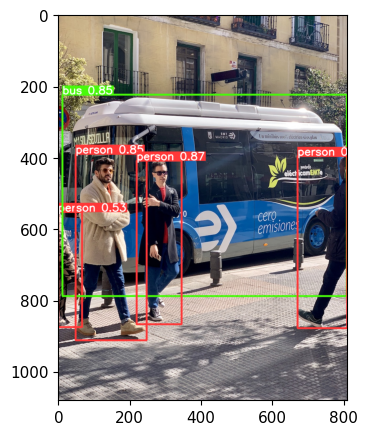

In [12]:
%matplotlib inline
plt.figure(figsize=(18,5))
plt.imshow(np.squeeze(result.render()))
plt.show()

In [ ]:
model(img)

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1080x810 4 persons, 1 bus
Speed: 17.2ms pre-process, 9.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 480)

Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,
        rescale=1./255,
        #shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
img10 = cv2.imread('/content/drive/MyDrive/curr_data/images/10dinars01.jpg')
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)
img20 = cv2.imread('/content/drive/MyDrive/curr_data/images/20 dinars (1).jpg')
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img50 = cv2.imread('/content/drive/MyDrive/curr_data/images/50 dinars (1).jpg')
img50 = cv2.cvtColor(img50, cv2.COLOR_BGR2RGB)

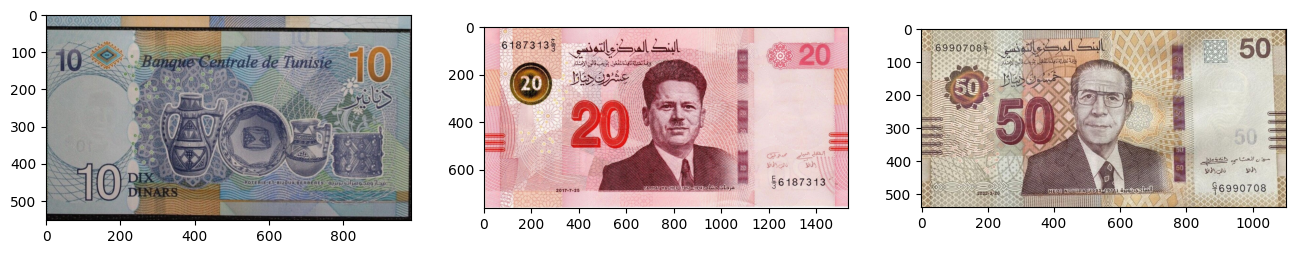

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img10)
plt.subplot(1,3,2)
plt.imshow(img20)
plt.subplot(1,3,3)
plt.imshow(img50)

In [ ]:
img_aug = cv2.imread('/content/drive/MyDrive/curr_data/images/5_back.jpg')
img_aug = cv2.cvtColor(img_aug, cv2.COLOR_BGR2RGB)

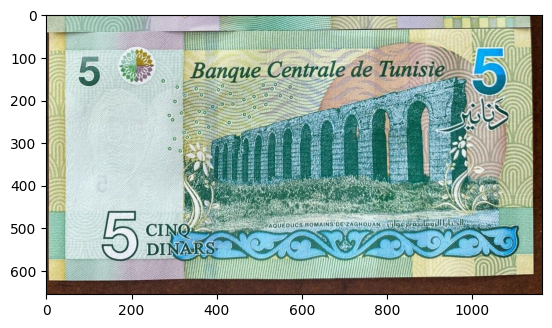

In [ ]:
plt.imshow(img_aug)

In [ ]:
img_aug.shape

(655, 1164, 3)

In [ ]:
img_aug = img_aug.reshape((1,) + img_aug.shape)  # this is a Numpy array with shape (1, *, *, *)

img_aug.shape

(1, 655, 1164, 3)

In [ ]:
i = 0
for batch in datagen.flow(img_aug, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/curr_data/images', save_prefix='5dt_back', save_format='jpg'):
    i += 1
    if i > 15:
        break

Split Data


In [13]:
!pip install split-folders

In [ ]:
# split folders

import splitfolders
input_folder = '/content/drive/MyDrive/curr_data/'
output = '/content/drive/MyDrive/currency'

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2), group_prefix=None)

Copying files: 472 files [00:08, 53.01 files/s] 


# Train Model

In [15]:
!cd /content/yolov5 && python train.py --img 320 --batch 16 --epochs 80 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

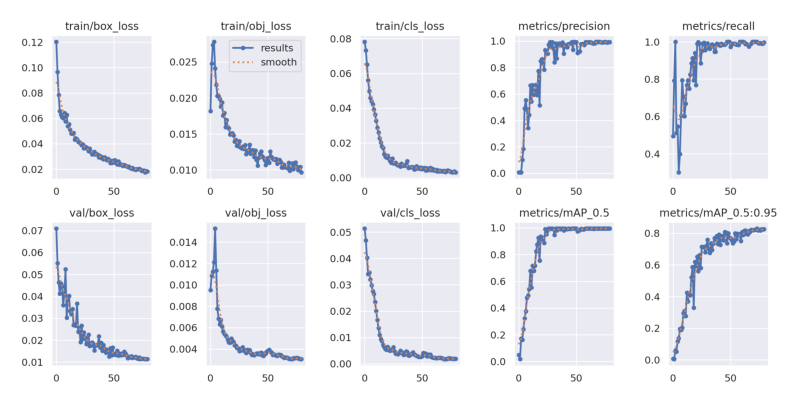

In [16]:
result_training = cv2.imread('/content/yolov5/runs/train/exp/results.png')
result_training = cv2.cvtColor(result_training, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.imshow(result_training)
plt.axis('off')
plt.show()

In [17]:
labels = cv2.imread('/content/yolov5/runs/train/exp/labels.jpg')
correlogram = cv2.imread('/content/yolov5/runs/train/exp/labels_correlogram.jpg')

labels = cv2.cvtColor(labels, cv2.COLOR_BGR2RGB)
correlogram = cv2.cvtColor(correlogram, cv2.COLOR_BGR2RGB)

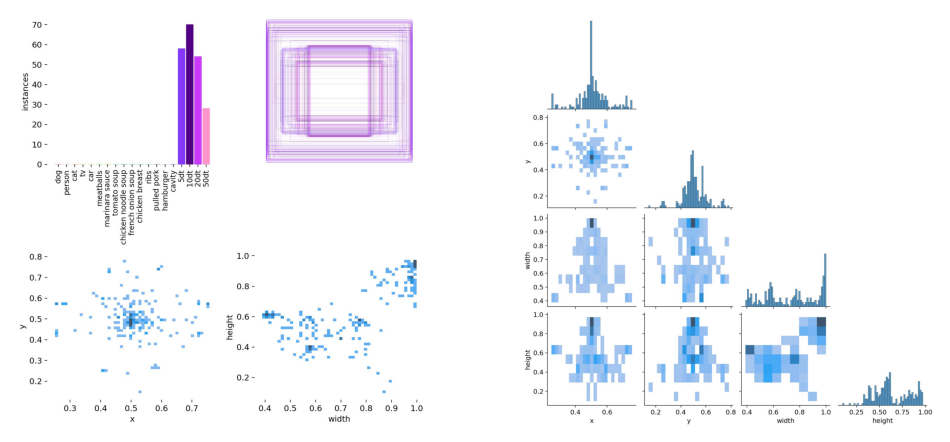

In [18]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(labels)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(correlogram)
plt.axis('off')
plt.show()

(-0.5, 1279.5, 1279.5, -0.5)

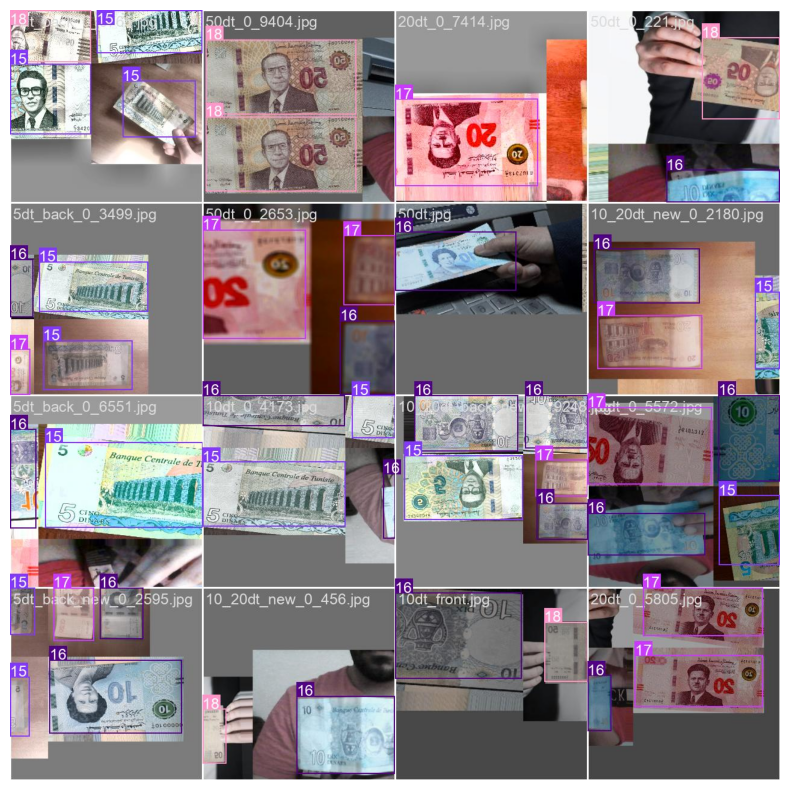

In [19]:
train_batch = cv2.imread('/content/yolov5/runs/train/exp/train_batch1.jpg')
train_batch = cv2.cvtColor(train_batch, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(train_batch)
plt.axis('off')

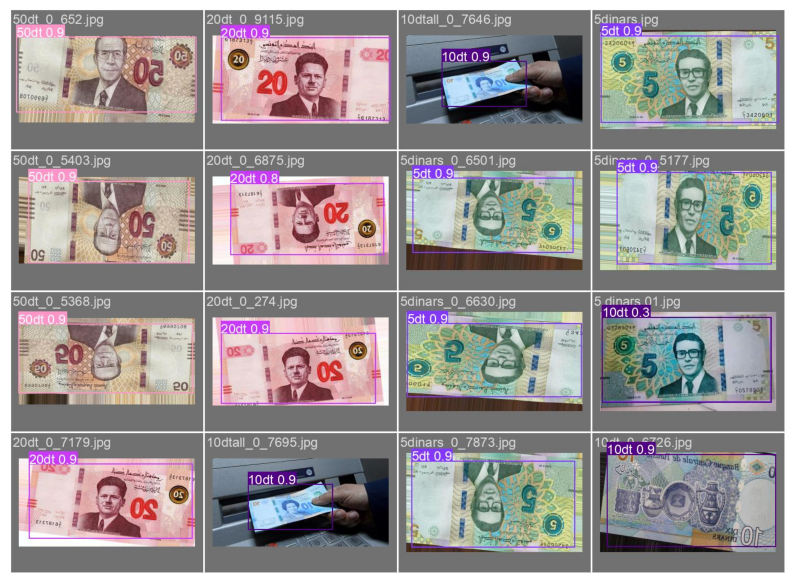

In [48]:
val_batch = cv2.imread('/content/yolov5/runs/train/exp/val_batch0_pred.jpg')
val_batch = cv2.cvtColor(val_batch, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(val_batch)
plt.axis('off')
plt.show()

In [ ]:
!pip install tensorboard

In [ ]:
%load_ext tensorboard

# Load custom Model


In [21]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-1 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients
Adding AutoShape... 


In [27]:
import os
img_test = os.path.join('/content/yolov5/data/images/test_img_33.png')

In [28]:
img_test

'/content/yolov5/data/images/test_img_33.png'

In [29]:
result = model(img_test)

In [30]:
result.print()

image 1/1: 720x920 1 5dt, 1 10dt, 1 20dt, 1 50dt
Speed: 28.9ms pre-process, 44.3ms inference, 1.4ms NMS per image at shape (1, 3, 512, 640)


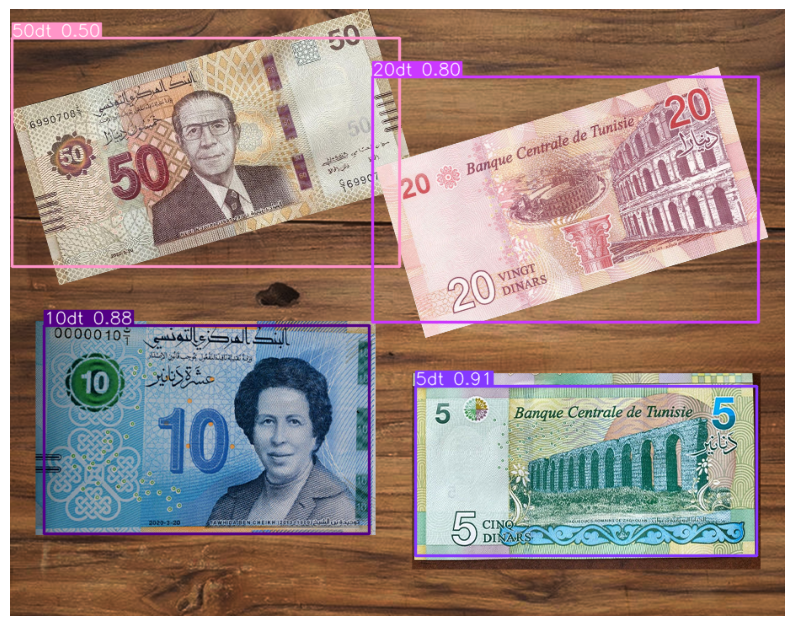

In [31]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(np.squeeze(result.render()))
plt.axis('off')
plt.show()

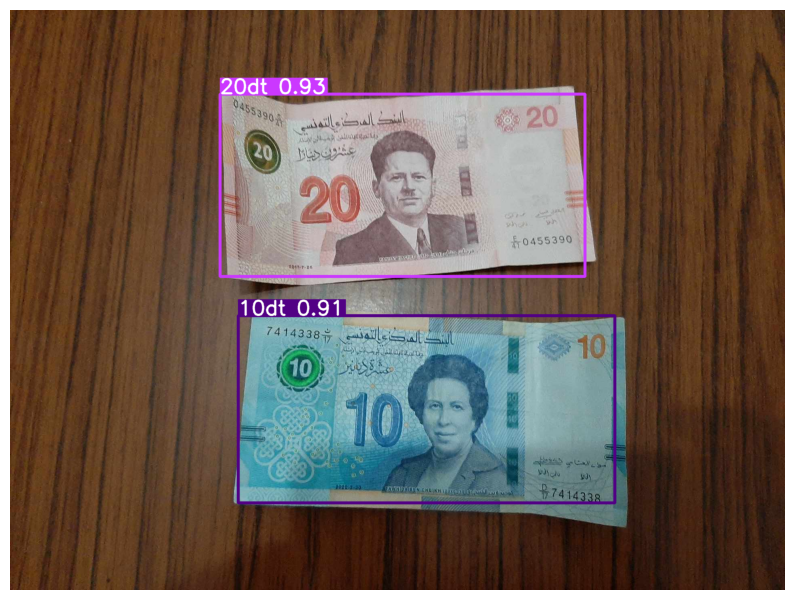

In [32]:
img_test2 = '/content/yolov5/data/images/10_20.jpg'
result = model(img_test2)
plt.figure(figsize=(10,8))
plt.imshow(np.squeeze(result.render()))
plt.axis('off')
plt.show()

In [33]:
result.print()

image 1/1: 1437x1920 1 10dt, 1 20dt
Speed: 43.6ms pre-process, 71.4ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)


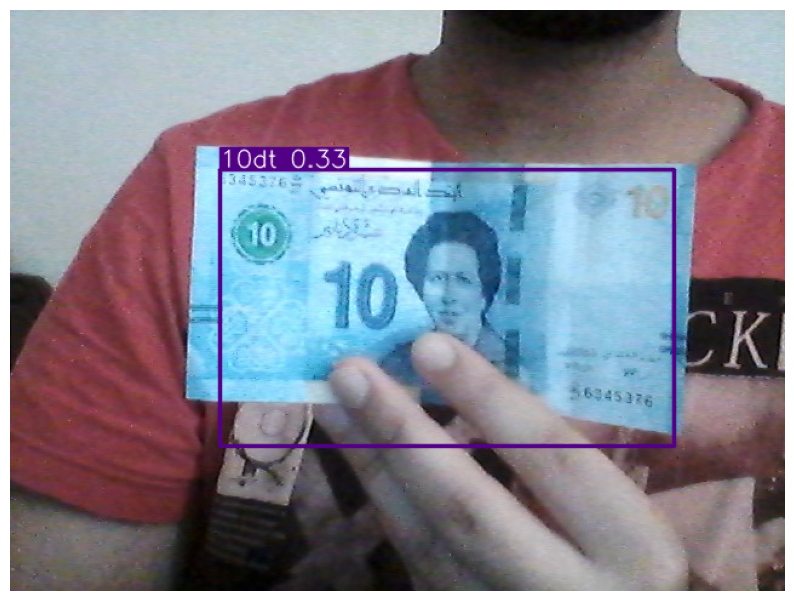

In [34]:
img_test3 = '/content/yolov5/data/images/10dt_front.jpg'
result = model(img_test3)
plt.figure(figsize=(10,8))
plt.imshow(np.squeeze(result.render()))
plt.axis('off')
plt.show()

In [35]:
!cd /content/yolov5 && python detect.py --source /content/drive/MyDrive/currency/test/images --weights /content/yolov5/runs/train/exp/weights/best.pt --img-size 320 --conf 0.4


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/currency/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
image 1/25 /content/drive/MyDrive/currency/test/images/10_20dt_back_new_0_6704.jpg: 256x320 1 10dt, 1 20dt, 41.0ms
image 2/25 /content/drive/MyDrive/currency/test/images/10_20dt_back_new_0_7421.jpg: 256x320 1 10dt, 1 20dt, 5.5ms
image 3/25 /content/drive/MyDrive/currency/test/images/10_20dt_back_new_0_821.

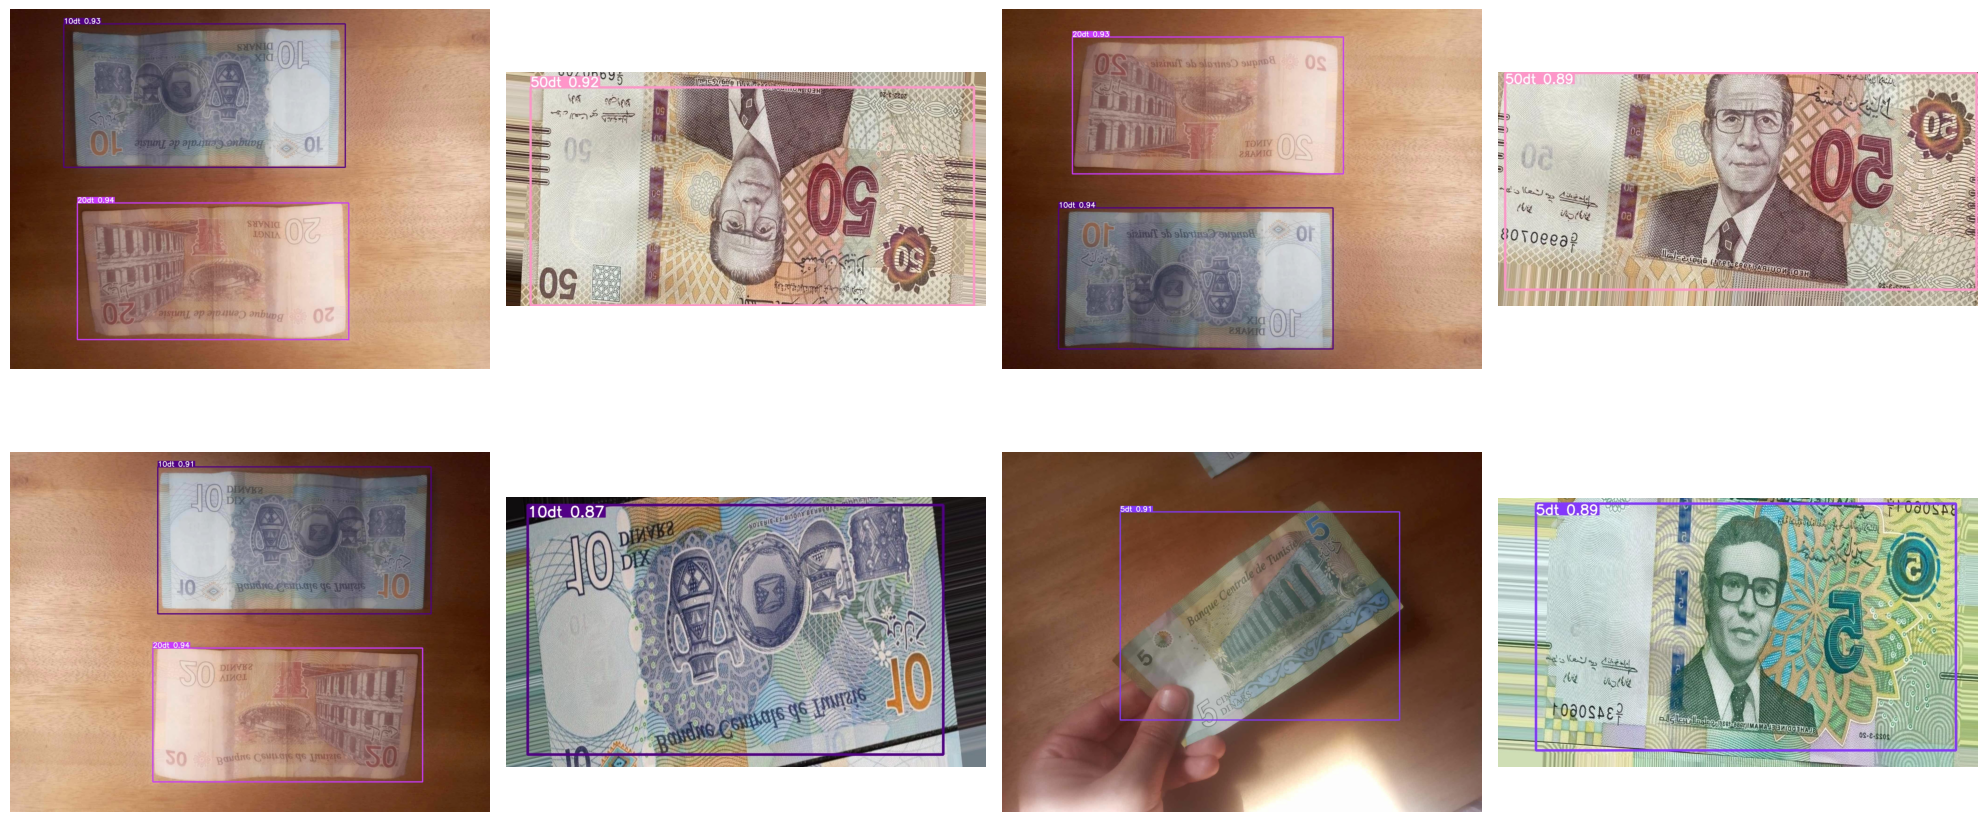

In [52]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Path to the folder containing the images
image_folder = "/content/yolov5/runs/detect/exp"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Display 6 images with 3 in each row
num_images_to_display = 8
images_per_row = 4

# Set up the plot
num_rows = num_images_to_display // images_per_row
if num_images_to_display % images_per_row != 0:
    num_rows += 1

plt.figure(figsize=(images_per_row*5, num_rows*5))

# Loop through the selected image files and plot them
for i, image_file in enumerate(image_files[:num_images_to_display]):
    plt.subplot(num_rows, images_per_row, i+1)
    img = mpimg.imread(os.path.join(image_folder, image_file))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks


plt.tight_layout()
plt.show()


In [39]:
!python detect.py --source /content/yolov5/data/images/5dt_test1.png --weights /content/yolov5/runs/train/exp/weights/best.pt --img-size 320 --conf 0.4


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/data/images/5dt_test1.png, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/yolov5/data/images/5dt_test1.png: 256x320 1 5dt, 70.4ms
Speed: 0.4ms pre-process, 70.4ms inference, 114.5ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp2


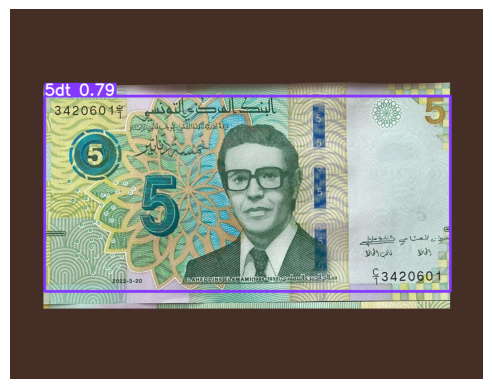

In [42]:
#plot the above detected img
img = cv2.imread('/content/yolov5/runs/detect/exp2/5dt_test1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

Export the models

In [ ]:
torch.save(model, '/content/drive/MyDrive/curr_data/best.pt')

In [ ]:
model2 = torch.hub.load('ultralytics/yolov5', 'custom',
                       path='/content/yolov5/runs/train/exp/weights/last_model.pt',force_reload=True)

torch.save(model2, '/content/drive/MyDrive/curr_data/last_model.pt')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-28 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
